# Example 2

Data are extracted from [here](https://community.storytellingwithdata.com/exercises/visualize-the-insight?page=17)

In [48]:
import pandas as pd

df = pd.read_csv('source/data2.csv')
df.head(20)

,Questions,Our store,All stores
0,The store is well-organized.,40%,38%
1,Fast and easy checkout.,33%,34%
2,Friendly and helpful employees.,45%,50%
3,Good promotions.,45%,65%
4,I can find what I'm looking for.,46%,55%
5,I can find the size I need.,39%,49%
6,A nice atmosphere.,80%,70%
7,Latest technology for easy shopping.,35%,34%
8,Lowest sales prices.,40%,60%
9,A wide selection.,49%,47%


In [49]:
columns = ['Our store', 'All stores']
for col in columns:
    df[col] = df[col].str.replace('%', '').astype(int)

In [50]:
from comet_ml import Experiment

def run_experiment(df, store):
    experiment = Experiment(project_name="data-narrative-2")
    experiment.set_name(store)
    for i in range(len(df)):
        experiment.log_metric(df['Questions'].iloc[i], df[store].iloc[i])
    experiment.end()

In [51]:
run_experiment(df,'Our store')
run_experiment(df,'All stores')

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/Users/angelica/Packt/Comet/Code/05' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/packt/data-narrative-2/a35bde667c464e3586fcd878a9371648

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/packt/data-narrative-2/a35bde667c464e3586fcd878a9371648
COMET INFO:   Metrics:
COMET INFO:     A nice atmosphere.                   : 80
COMET INFO:     A wide selection.                    : 49
COMET INFO:     Fast and easy checkout.         

In [52]:
df['diff'] = df['Our store'] - df['All stores']
df = df.sort_values(by=['diff'])

In [53]:
df.head(20)

,Questions,Our store,All stores,diff
3,Good promotions.,45,65,-20
8,Lowest sales prices.,40,60,-20
5,I can find the size I need.,39,49,-10
4,I can find what I'm looking for.,46,55,-9
2,Friendly and helpful employees.,45,50,-5
1,Fast and easy checkout.,33,34,-1
7,Latest technology for easy shopping.,35,34,1
0,The store is well-organized.,40,38,2
9,A wide selection.,49,47,2
6,A nice atmosphere.,80,70,10


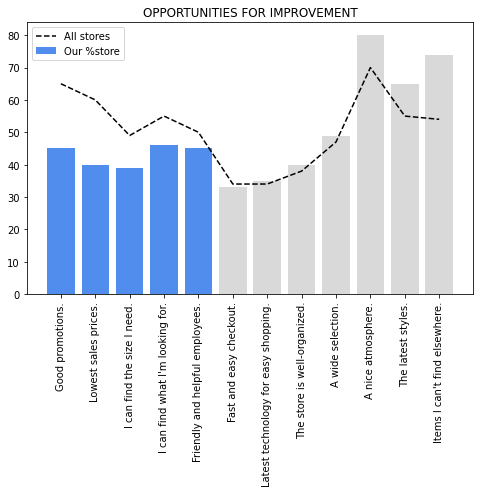

In [54]:
import matplotlib.pyplot as plt

cc=list(map(lambda x: '#508DED' if x < -1 else '#D9D9D9', df['diff']))
plt.figure(figsize=(8,5))
plt.bar(df['Questions'], df['Our store'], color = cc, label='Our %store')
plt.plot(df['Questions'], df['All stores'], color='#000000', ls='--', label='All stores')
plt.xticks(rotation=90)
plt.title('OPPORTUNITIES FOR IMPROVEMENT')
plt.legend()
plt.show() #40B7AD

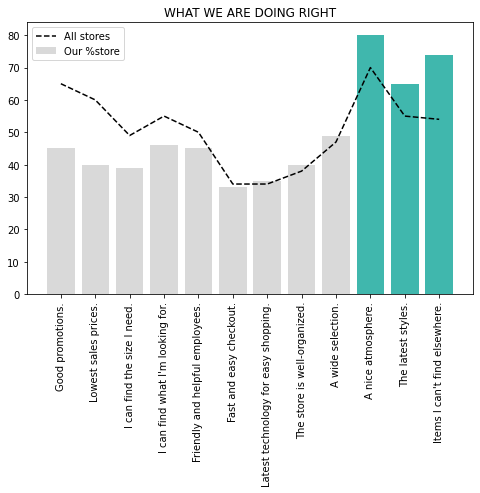

In [55]:
cc=list(map(lambda x: '#40B7AD' if x > 2 else '#D9D9D9', df['diff']))
plt.figure(figsize=(8,5))
plt.bar(df['Questions'], df['Our store'], color = cc, label='Our %store')
plt.plot(df['Questions'], df['All stores'], color='#000000', ls='--', label='All stores')
plt.xticks(rotation=90)
plt.title('WHAT WE ARE DOING RIGHT')
plt.legend()
plt.show() 